# Random Forest Algorithm

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('D9data3.csv')
dataset

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [3]:
#Independent variable
X = dataset.iloc[:,:-1].values

#Dependent variable or Class label
y = dataset.iloc[:,-1].values

In [12]:
X


array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000],
       [    26,  80000],
       [    26,  52000],
       [    20,  86000],
       [    32,  18000],
       [    18,  82000],
       [    29,  80000],
       [    47,  25000],
       [    45,  26000],
       [    46,  28000],
       [    48,  29000],
       [    45,  22000],
       [    47,  49000],
       [    48,  41000],
       [    45,  22000],
       [    46,  23000],
       [    47,  20000],
       [    49,  28000],
       [    47,  30000],
       [    29,  43000],
       [    31,  18000],
       [    31,  74000],
       [    27, 137000],
       [    21,  16000],
       [    28,  44000],
       [    27,  90000],
       [    35,  27000],
       [    33,  28000],
       [    30,  49000],
       [    26,  72000],
       [    27,  31000],


In [4]:
#Splitting of data into training and testing
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X, y, test_size=0.25,random_state=0)

In [5]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [6]:
#Model Building
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=200, criterion='entropy', random_state=0)
classifier.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=200, random_state=0)

In [7]:
#Prediction
y_pred = classifier.predict(X_test)

In [8]:
#Model evaluation metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

print(confusion_matrix(y_test,y_pred))

[[63  5]
 [ 3 29]]


In [9]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        68
           1       0.85      0.91      0.88        32

    accuracy                           0.92       100
   macro avg       0.90      0.92      0.91       100
weighted avg       0.92      0.92      0.92       100



In [10]:
accuracy_score(y_test,y_pred)

0.92

AttributeError: 'RandomForestClassifier' object has no attribute 'tree_'

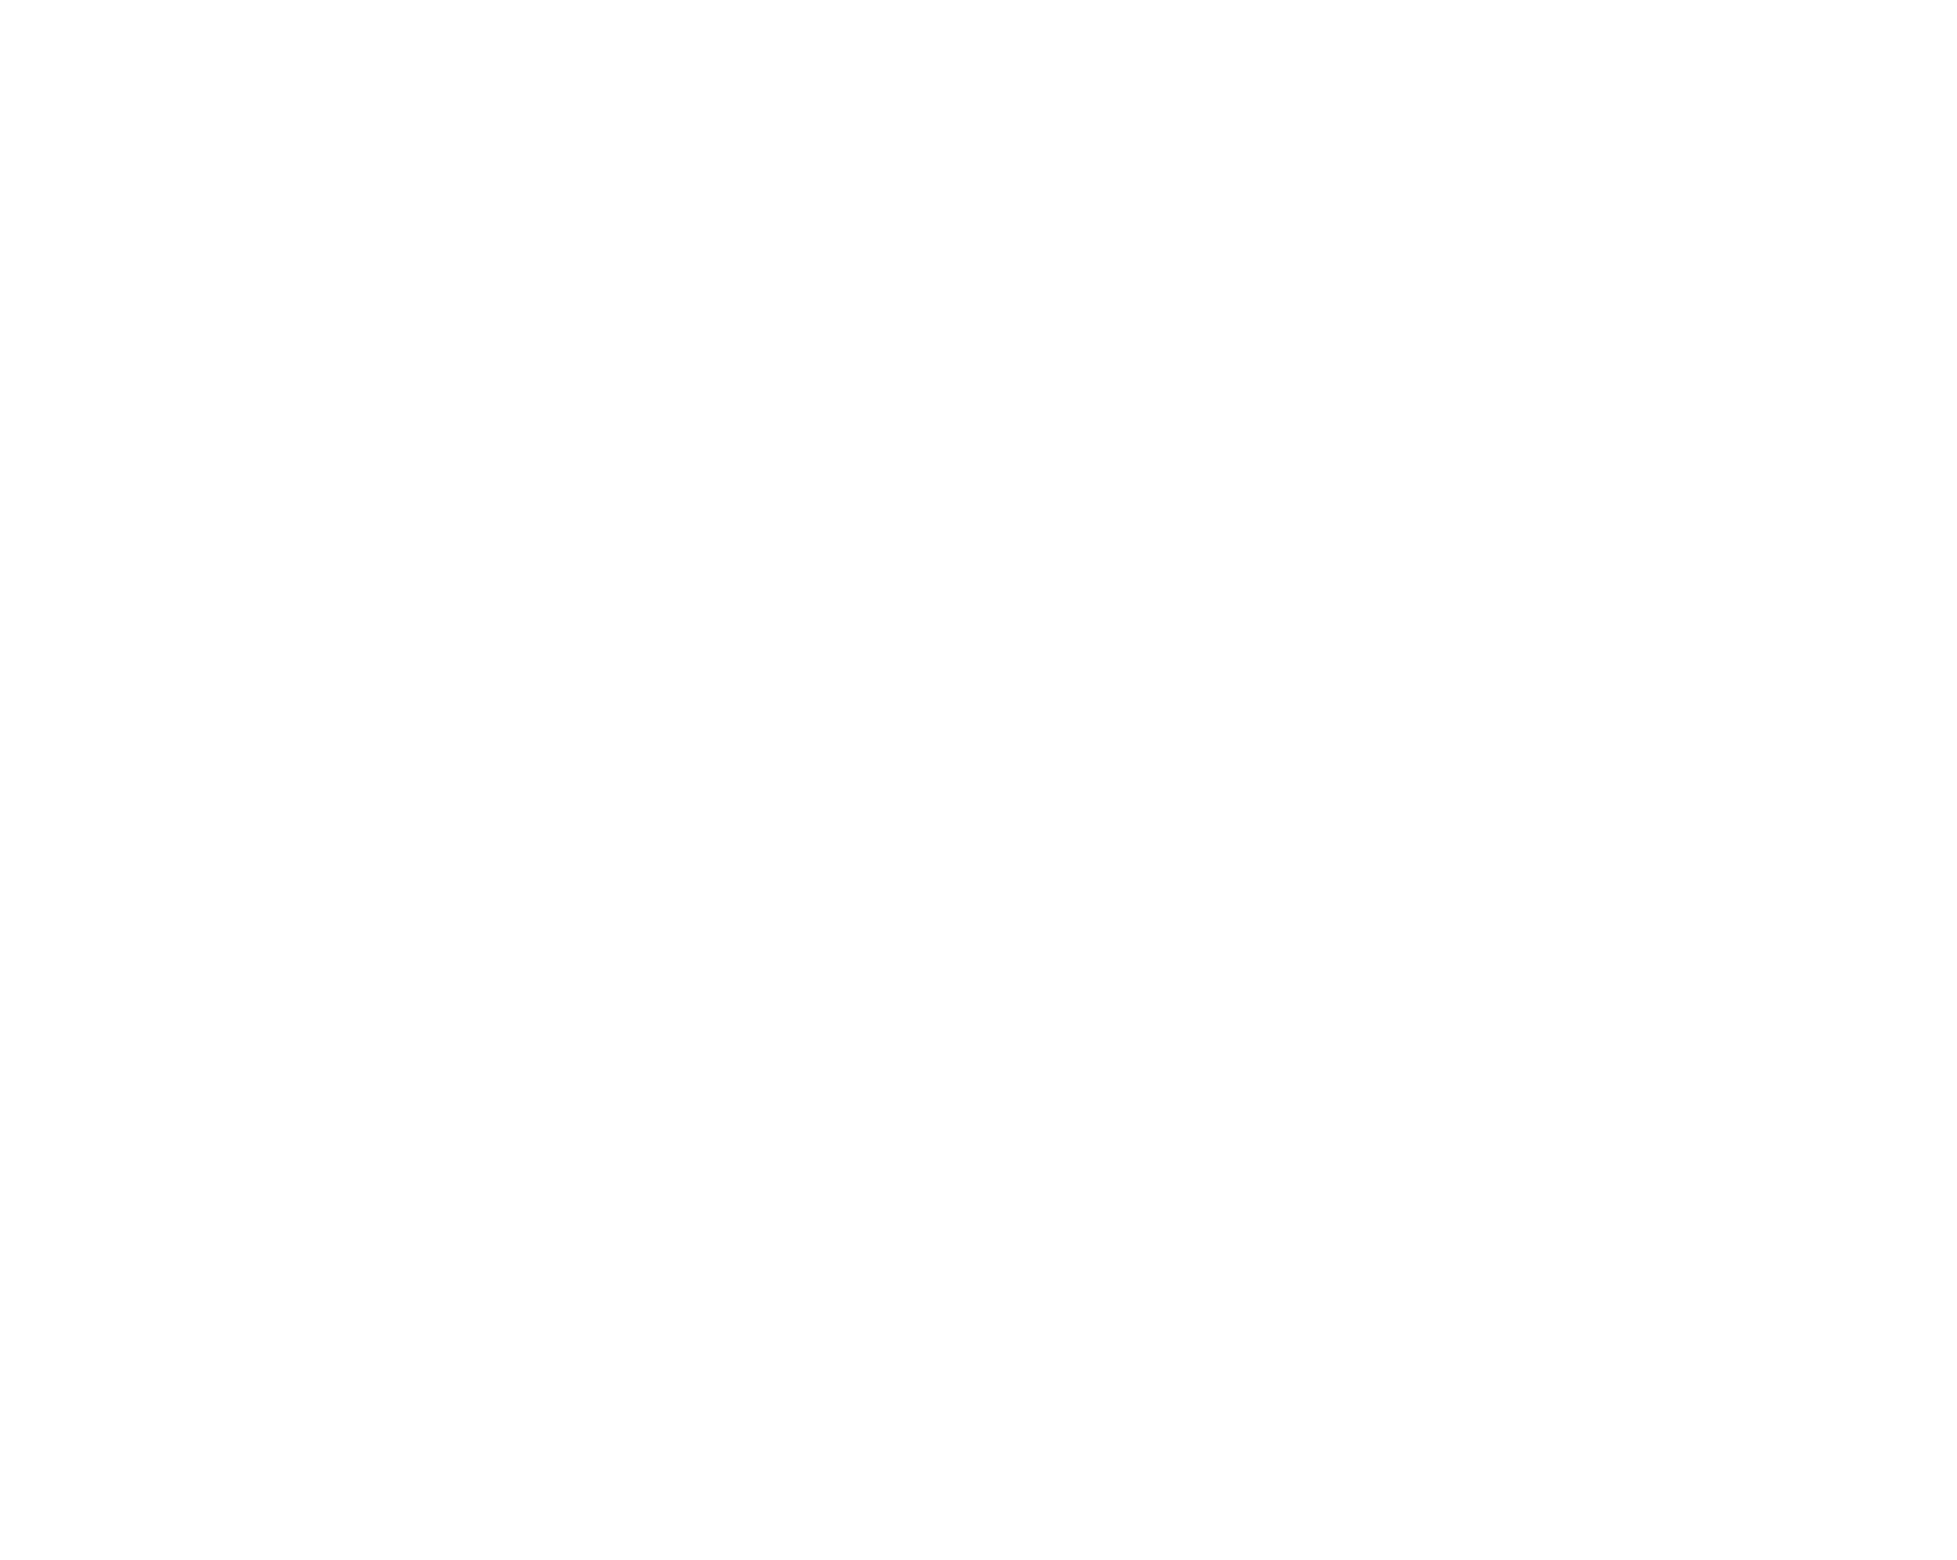

In [11]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(classifier, 
                   feature_names=dataset.columns,  
                   class_names="Purchased",
                   filled=True)